# Emerging patterns of opinion formation in social structures
## Complex System Simulation
### Group 3 

Jonas Schafer

Chayenne Olumuyiwa

Mingjie Li

Pablo Alves

---

## Imports

In [3]:
import numpy as np
import random
import math
import os
import csv
import powerlaw
import scipy as sp
import cellpylib as cpl
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import networkx as nx
from scipy.ndimage import measurements
from pylab import *

ModuleNotFoundError: No module named 'cellpylib'

In [4]:
# Our modules
import demos.ca.cellular_automata as ca
import networkx as nx
from demos.network.network import Network
import matplotlib.pyplot as plt

## Seed

In [6]:
np.random.seed(42)

---
## 1. Phase Diagram for Circular Social Space
***Original file***: diagram_1_complete.py


In [7]:
# Diagram parameters
NUMBER_OF_SL_VALUES_TO_TEST = 5 #10
SIMS_PER_SL_VALUE = 3 #10
NUMBER_OF_P1_VALUES_PER_SL = 3 # For the deterministic case
TEMPERATURE_VALUES_PER_SL = 3
TMAX = 100

# Global CA parameters
GRIDSIZE_X,GRIDSIZE_Y = 25,25
TIMESTEPS = 50
TEMP = 0
BETA = 1
BETA_LEADER = 1
H = 0
P_OCCUPATION = 1
P_OPINION_1 = 0
a_0 = 1 # Size of initial cluster around leader
S_MEAN = 1

In [8]:
# Compute analytical values
R = GRIDSIZE_X/2
S_L_min = ca.minimun_leader_strength(R,BETA,H)
S_L_max = ca.maximun_leader_strength(R,BETA,H)
cluster_min = ca.a(R,BETA,H,S_L_min)
cluster_max = ca.a(R,BETA,H,S_L_max)
xmin,xmax = 0,2*S_L_max
ymin,ymax = 0,22.5

# Prepare data structures of iterating values
SL_values = np.linspace(0,2*S_L_max,NUMBER_OF_SL_VALUES_TO_TEST)
p_1_values = np.linspace(0,1,NUMBER_OF_P1_VALUES_PER_SL)
temperatures = np.linspace(0,TMAX,TEMPERATURE_VALUES_PER_SL) # Ignore the first value, T=0

# Prepare data structures of results
points_x_stoc = np.zeros(NUMBER_OF_SL_VALUES_TO_TEST*TEMPERATURE_VALUES_PER_SL*SIMS_PER_SL_VALUE)
points_y_stoc = np.zeros(NUMBER_OF_SL_VALUES_TO_TEST*TEMPERATURE_VALUES_PER_SL*SIMS_PER_SL_VALUE)
points_t_stoc = np.zeros(NUMBER_OF_SL_VALUES_TO_TEST*TEMPERATURE_VALUES_PER_SL*SIMS_PER_SL_VALUE)

c:\Users\Pablo\Desktop\CSS\Project\complex-systems-project\demos\ca\cellular_automata.py:491: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt((2*np.pi*r - np.sqrt(np.pi) - beta - h)**2 - 32 * s_l))


In [ ]:
# Perform the simulation for all SL
for i in range(NUMBER_OF_SL_VALUES_TO_TEST):
    S_LEADER = SL_values[i]
    print(f'SL value: {i+1}/{NUMBER_OF_SL_VALUES_TO_TEST}')

    # And all temperatures, which includes t=0
    for j in range(TEMPERATURE_VALUES_PER_SL):
        TEMP = temperatures[j]

        print('T',TEMP)

        # And many times per temperature
        for k in range(SIMS_PER_SL_VALUE):
            model = ca.CA(gridsize_x=GRIDSIZE_X, gridsize_y=GRIDSIZE_Y, temp=TEMP, beta_leader=BETA_LEADER, beta=BETA, h=H, p_occupation=P_OCCUPATION, p_opinion_1=P_OPINION_1, s_leader=S_LEADER, s_mean=S_MEAN)
            data = model.evolve(TIMESTEPS)
            last_cluster_size = np.mean(data['cluster_sizes'])
            
            # Compute index of current simulation
            index = i*NUMBER_OF_SL_VALUES_TO_TEST + j*TEMPERATURE_VALUES_PER_SL + k*SIMS_PER_SL_VALUE
            
            # Save the data
            points_x_stoc[index] = S_LEADER
            points_y_stoc[index] = last_cluster_size
            points_t_stoc[index] = TEMP


In [ ]:
# Save the results in separate files
np.savetxt('./figures/diagram1_points_slvalues.npy',points_x_stoc,delimiter=",")
np.savetxt('./figures/diagram1_points_clustersize.npy',points_x_stoc,delimiter=",")
np.savetxt('./figures/diagram1_points_temperatures.npy',points_x_stoc,delimiter=",")

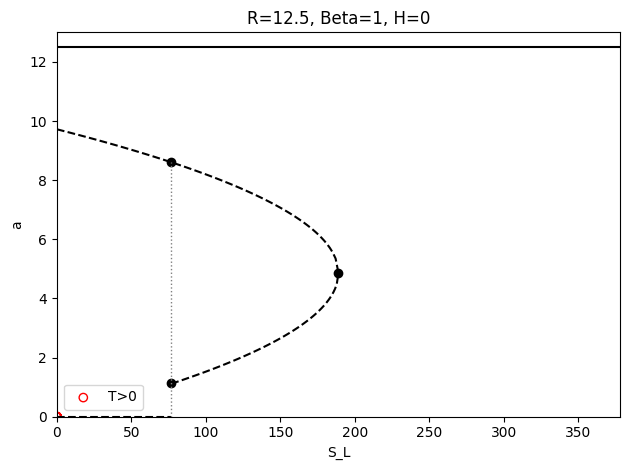

In [9]:
# Plotting

# Get the plot of the analytical equations
fig, ax = ca.plot_diagram(R,BETA,H)

# Add the simulation points
ax.scatter(points_x_stoc, points_y_stoc,label='T>0', facecolors='none', edgecolors='red')

# Update the axis limits
ax.set_xlim(0,2*S_L_max)
ax.set_ylim(0,int(R)+1)

plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('./figures/diagram1_points_temperatures.png')
plt.show(block=True)

---
## 2. Overcoming leader

### 2.1 Critical temperature threshold
***Original file***: threshold_plot.py 

In [12]:
# Diagram parameters
NUMBER_OF_T_VALUES_TO_TEST = 5 # Should be 20
SIMS_PER_T_VALUE = 5 # Should be 30 for final one!
T_MAX = 100
S_LEADER = 400             # May need to tweak this to ensure we are on cluster region!

# Global CA parameters
GRIDSIZE_X,GRIDSIZE_Y = 15,15
TIMESTEPS = 20
BETA = 1
BETA_LEADER = 1
H = 0
P_OCCUPATION = 1
P_OPINION_1 = 1 # In this scenario everybody believes the leader at start
a_0 = 1
S_MEAN = 1

In [13]:
# Compute analytical values
R = GRIDSIZE_X/2
THRESHOLD =  int(np.sqrt((R**2)/2)) #5 # Run again with dynamic! threshold # Maximun leader cluster radius that is not considered opinion overcomming
S_L_min = ca.minimun_leader_strength(R,BETA,H)
S_L_max = ca.maximun_leader_strength(R,BETA,H)
cluster_min = ca.a(R,BETA,H,S_L_min)
cluster_max = ca.a(R,BETA,H,S_L_max)
xmin,xmax = 0,2*S_L_max
ymin,ymax = 0,22.5

/Users/chayenneolumuyiwa/Documents/Universiteit/Computational Science/jaar 1 /complex system sim/complex-systems-project/demos/ca/cellular_automata.py:491: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt((2*np.pi*r - np.sqrt(np.pi) - beta - h)**2 - 32 * s_l))


In [14]:
# Save parameters in a file
params_used = {'NUMBER_OF_T_VALUES_TO_TEST':NUMBER_OF_T_VALUES_TO_TEST,
               'SIMS_PER_T_VALUE':SIMS_PER_T_VALUE,
               'T_MAX':T_MAX,
               'THRESHOLD':THRESHOLD,
               'S_LEADER':S_LEADER,
               'GRIDSIZE_X': 21,
               'GRIDSIZE_Y':21,
               'TIMESTEPS':TIMESTEPS,
               'BETA':BETA,
               'BETA_LEADER':BETA_LEADER,
               'H':H,
               'P_OCCUPATION':P_OCCUPATION,
               'P_OPINION_1':P_OPINION_1,
               'a_0':a_0,
               'S_MEAN':S_MEAN,
               'R':R,
               'S_L_min':S_L_min,
               'S_L_max':S_L_max,
               'cluster_min':cluster_min,
               'cluster_max':cluster_max,
               'xmin':xmin,
               'xmax':xmax,
               'ymin':ymin,
               'ymax':ymax
               }

with open('./figures/t_threshold_plot_params.csv', 'w') as f:
    w = csv.DictWriter(f, params_used.keys())
    w.writeheader()
    w.writerow(params_used)

100%|███████████████████████████████████████████| 20/20 [00:00<00:00, 48.76it/s]


AttributeError: 'NoneType' object has no attribute 'grid'

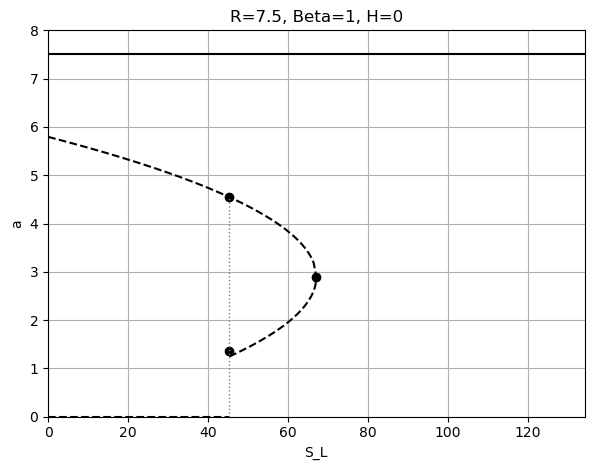

In [15]:
# Perform one test simulation first to ensure we are in he cluster region of the system
TEMP = 0

model = ca.CA(gridsize_x=GRIDSIZE_X, gridsize_y=GRIDSIZE_Y, temp=TEMP, beta=BETA, beta_leader=BETA_LEADER, h=H, p_occupation=P_OCCUPATION, p_opinion_1=P_OPINION_1, s_leader=S_LEADER, s_mean=S_MEAN, show_tqdm=True)
data = model.evolve(TIMESTEPS)

simulation = data['opinions']
cluster_sizes = data['cluster_sizes']
last_cluster = cluster_sizes[-1]

# Do diagram plot with the last cluster to ensure we are in the right region
fig, ax = ca.plot_diagram(R,BETA,H)
ax.set_xlim(0,2*S_L_max)
ax.set_ylim(0,int(R)+1)
ax.scatter(S_LEADER,last_cluster)

# Show and save plot
plt.grid()
plt.tight_layout()
plt.savefig('./figures/t_threshold_plot_start_analyticall.png')
plt.show(block=True)

# Show starting grid to ensure everybody starts believing the leader
fig, ax = plt.subplots()
grid_t = simulation[-1,:,:]
im = ax.imshow(grid_t, cmap='seismic',
                interpolation='nearest', vmin=-1, vmax=1)

plt.tight_layout()
plt.savefig('./figures/t_threshold_plot_start_grid.png')
plt.show()

In [16]:
# Prepare data structures
temperatures = np.linspace(0,T_MAX,NUMBER_OF_T_VALUES_TO_TEST)
p_overcoming_leader = np.zeros(NUMBER_OF_T_VALUES_TO_TEST)
means =  np.zeros(NUMBER_OF_T_VALUES_TO_TEST)
std_devs = np.zeros(NUMBER_OF_T_VALUES_TO_TEST)

In [17]:
# Simulate
for index in range(NUMBER_OF_T_VALUES_TO_TEST):
    TEMP = temperatures[index]
    leader_overcomed = 0
    last_cluster_sizes = np.zeros(SIMS_PER_T_VALUE)
    print(f'Sim {index+1}/{NUMBER_OF_T_VALUES_TO_TEST}')
    
    for sim in range(SIMS_PER_T_VALUE):
        model = ca.CA(gridsize_x=GRIDSIZE_X, gridsize_y=GRIDSIZE_Y, temp=TEMP, beta=BETA, beta_leader=BETA_LEADER, h=H, p_occupation=P_OCCUPATION, p_opinion_1=P_OPINION_1, s_leader=S_LEADER, s_mean=S_MEAN, show_tqdm=True)
        data = model.evolve(TIMESTEPS)
        last_cluster_size = data['cluster_sizes'][-1]
        
        # Save to make std dev
        last_cluster_sizes[sim] = last_cluster_size

        # Check if unification was overcomed!
        if last_cluster_size <= THRESHOLD:
            leader_overcomed += 1
    
    # Compute probability of overcoming leader
    p_overcoming_leader[index] = leader_overcomed / SIMS_PER_T_VALUE

    # The std dev is the std dev in the distrib that has leader_overcomed 1s and the other elements 0s
    runs = np.zeros(SIMS_PER_T_VALUE)
    runs[:leader_overcomed] = 1
    std_devs[index] = np.std(runs)

    mean = np.mean(runs)
    means[index] = mean


Sim 1/5


100%|███████████████████████████████████████████| 20/20 [00:00<00:00, 49.70it/s]


Sim 2/5


100%|███████████████████████████████████████████| 20/20 [00:00<00:00, 47.83it/s]


Sim 3/5


100%|███████████████████████████████████████████| 20/20 [00:00<00:00, 46.90it/s]


Sim 4/5


100%|███████████████████████████████████████████| 20/20 [00:00<00:00, 47.00it/s]


Sim 5/5


100%|███████████████████████████████████████████| 20/20 [00:00<00:00, 47.72it/s]


In [18]:
# Print and save results
print(p_overcoming_leader)
print(means)
print(std_devs)

[0.  0.  0.  0.4 1. ]
[0.  0.  0.  0.4 1. ]
[0.         0.         0.         0.48989795 0.        ]


In [19]:
# Save the data
np.savetxt('./figures/t_threshold_plot_temperatures.npy',temperatures,delimiter=",")
np.savetxt('./figures/t_threshold_plot_tp_overcoming_leader.npy',p_overcoming_leader,delimiter=",")
np.savetxt('./figures/t_threshold_plot_means.npy',means,delimiter=",")
np.savetxt('./figures/t_threshold_plot_std_devs.npy',std_devs,delimiter=",")

In [20]:
# Plot and save the threshold phenomena
plt.figure()
plt.plot(temperatures,p_overcoming_leader,lw=2,c='blue')
plt.fill_between(temperatures, np.array(means)-np.array(std_devs), np.array(means)+np.array(std_devs), alpha=0.3)

plt.xlim([0,T_MAX])
plt.ylim([0,1])

plt.suptitle('Effect of temperature on overcoming leader consensus')
plt.title(f'R={R}, {SIMS_PER_T_VALUE} runs/T, T_MAX={T_MAX},THRESHOLD={THRESHOLD}')
plt.xlabel('Temperature')
plt.ylabel('p(Overcoming leader)')

plt.grid()
plt.tight_layout()
plt.savefig('./figures/t_threshold_plot.png')
plt.show()

AttributeError: 'NoneType' object has no attribute 'figure'

---
## 3. Self-organized Criticality

In [21]:
# Step 0 - Find the critical temperature of the system
# Step 1 - Set the system to the critical temperature
TIMESTEPS = 250 # 2000
critical_temperature = 50 #30

# Step 2 - Set system to the parameters used to find the critical temperature
GRIDSIZE_X,GRIDSIZE_Y = 25,25
#TIMESTEPS = 2000
#TEMPERATURE = 0
BETA_PEOPLE = 1
BETA_LEADER = 1
H = 0
p = 1
p_1 = 1 # In this scenario everybody believed the leader at start for calibration, but here in simulation we dont need it anymore!!!

INFLUENCE_LEADER = 100             # The one 
a_0 = 1
INFLUENCE_DISTRIBUTION_MEAN = 1



In [23]:
# Step 3 - Simulate system at this critical temperature
temperature = critical_temperature
model = ca.CA(GRIDSIZE_X, GRIDSIZE_Y, p, p_1, critical_temperature, H, BETA_PEOPLE, BETA_LEADER, INFLUENCE_DISTRIBUTION_MEAN, INFLUENCE_LEADER, 'euclidean', 'linear', 1, 'uniform', True)
data = model.evolve(TIMESTEPS)

100%|██████████| 250/250 [02:12<00:00,  1.88it/s]


In [25]:
# Save data
np.save('./figures/SOC_sim.npy', np.array(data))
np.save('./figures/SOC_sim_opinions.npy', data['opinions'])
np.save('./figures/SOC_sim_cluster_sizes.npy', data['cluster_sizes'])

with open('./figures/SOC_sim.csv', 'w') as f:  # You will need 'wb' mode in Python 2.x
    w = csv.DictWriter(f, data.keys())
    w.writeheader()
    w.writerow(data)


params_used = {
               'CRITICAL_TEMPERATURE':critical_temperature,
               'TIMESTEPS':TIMESTEPS,
               'S_LEADER':INFLUENCE_LEADER,
               'GRIDSIZE_X': GRIDSIZE_X,
               'GRIDSIZE_Y': GRIDSIZE_Y,
               'TIMESTEPS':TIMESTEPS,
               'BETA_PEOPLE':BETA_PEOPLE,
               'BETA_LEADER':BETA_LEADER,
               'INFLUENCE_LEADER':INFLUENCE_LEADER,
               'H':H,
               'P_OCCUPATION':p,
               'P_OPINION_1':p_1,
               'a_0':a_0,
               'S_MEAN':INFLUENCE_DISTRIBUTION_MEAN,
               'N':model.N
               }

with open('./figures/SOC_params.csv', 'w') as f:  # You will need 'wb' mode in Python 2.x
    w = csv.DictWriter(f, params_used.keys())
    w.writeheader()
    w.writerow(params_used)


In [26]:
# Step 4 - Plot opinion change at this temperature
data_copy = data.copy()
model.plot_opinion_grid_evolution(data_copy,save=True)

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


In [ ]:
# Step 5 - Get cluster sizes from simulation,
# Testing the counting at 5fth time step 

# Prepare arrays to only count -1 opinions
R = int(GRIDSIZE_X/2)
opinions = data_copy['opinions'][5].copy()
opinions[opinions == 1] = 0
opinions[opinions == -1] = 1

lw, num_cluster = measurements.label(opinions)
areas = measurements.sum(opinions, lw, index=arange(lw.max() + 1))
unique, counts = np.unique(areas, return_counts=True)
print('Unique values and counts',unique,counts)


In [ ]:
# Step 6 - Plot them to see if their sizes follow power law
plt.scatter(unique,counts,facecolors='none', edgecolors='blue')

In [ ]:
# Same thing but with entire simulation
data_copy = data.copy()
sim_data = data_copy.copy()

total_unique = np.linspace(1,model.N,model.N)
total_counts = np.zeros(model.N).astype(int)

#print('Total counts',total_counts)

for time_step in range(TIMESTEPS):
    data_t = sim_data['opinions'][time_step, :, :].copy()
    data_t[data_t == 1] = 0
    data_t[data_t == -1] = 1

    lw, num_cluster = measurements.label(data_t)
    areas = measurements.sum(data_t, lw, index=arange(lw.max() + 1))
    unique, counts = np.unique(areas, return_counts=True)

    unique = unique.astype(int)
    counts = counts.astype(int)

    # Update the total_counts at those locations
    #np.take(total_counts, unique)
    # https://numpy.org/doc/stable/reference/generated/numpy.put.html
    np.put(total_counts,unique,np.take(total_counts, unique) + counts) # Should be counts+previous value


d=total_counts
fit = powerlaw.Fit(np.array(d)+1,xmin=1,discrete=True)
fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_pdf( color= 'b')

print(fit)
print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)


In [ ]:
plt.loglog(total_unique,total_counts)
print(total_counts)

In [ ]:
# Orignal file: SOC_plot.py

---
## 4. Low temperature mean-field approximation 

---
## 5. Network / CA equivalency

In [5]:
# Set parameters
GRIDSIZE_X,GRIDSIZE_Y = 21,21
TIMESTEPS = 30
TEMP = 10
BETA = 1
BETA_LEADER = 1
H = 0
P_OCCUPATION = 1
P_OPINION_1 = 1

#Grid
S_LEADER = 150  # Leader influence
S_MEAN = 1

#Barabasi-Albert
C_LEADER = 20

100%|███████████████████████████████████████████| 30/30 [00:04<00:00,  7.47it/s]
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


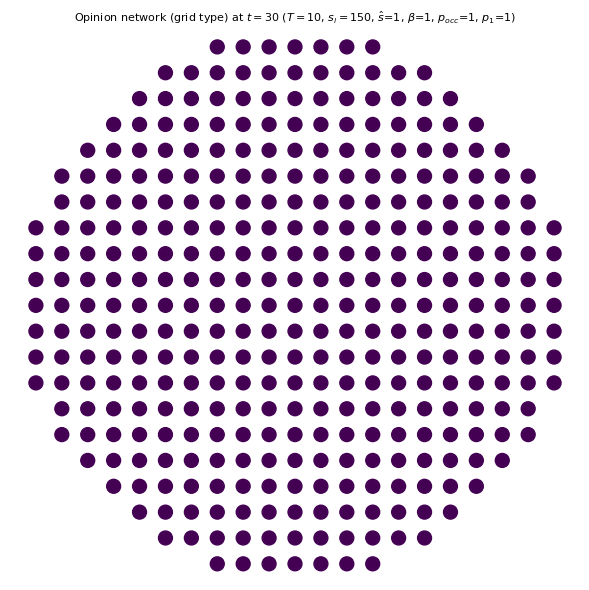

In [6]:
# First we model the network as a grid with both T=0, T=25

NETWORK_TYPE = 'grid'
network = Network(gridsize_x=GRIDSIZE_X, gridsize_y=GRIDSIZE_Y, temp=TEMP, beta=BETA, beta_leader=BETA_LEADER, h=H, p_occupation=P_OCCUPATION, p_opinion_1=P_OPINION_1, s_leader=S_LEADER, s_mean=S_MEAN , network_type = NETWORK_TYPE, c_leader = C_LEADER)
data = network.evolve(TIMESTEPS)
network.plot_opinion_network_evolution(data, interval=10, save = True)
plt.show()

---
## 6 and 7. Barabasi-Albert Networks and Leader strength study


INFO:root:Created Barabasi-Albert graph with N=332 and m=4.
100%|██████████████████████████████████████████| 30/30 [00:00<00:00, 220.52it/s]
INFO:root:Created Barabasi-Albert graph with N=332 and m=4.
100%|██████████████████████████████████████████| 30/30 [00:00<00:00, 237.46it/s]
INFO:root:Created Barabasi-Albert graph with N=332 and m=4.
100%|██████████████████████████████████████████| 30/30 [00:00<00:00, 239.78it/s]
INFO:root:Created Barabasi-Albert graph with N=332 and m=4.
100%|██████████████████████████████████████████| 30/30 [00:00<00:00, 241.06it/s]
INFO:root:Created Barabasi-Albert graph with N=332 and m=4.
100%|██████████████████████████████████████████| 30/30 [00:00<00:00, 240.76it/s]
INFO:root:Created Barabasi-Albert graph with N=332 and m=4.
100%|██████████████████████████████████████████| 30/30 [00:00<00:00, 233.17it/s]
INFO:root:Created Barabasi-Albert graph with N=332 and m=4.
100%|██████████████████████████████████████████| 30/30 [00:00<00:00, 238.23it/s]
INFO:root:Cre

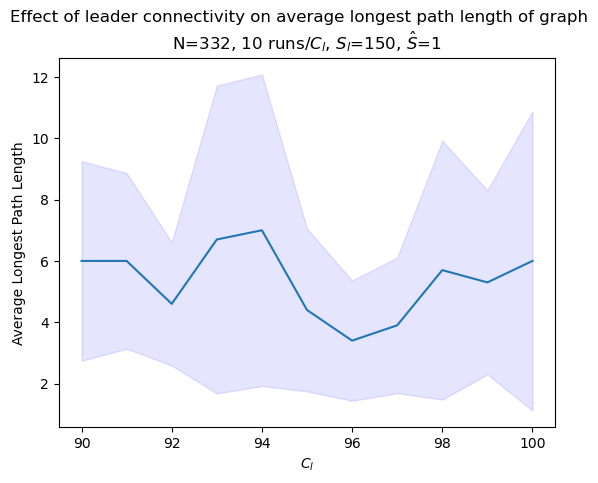

In [8]:
NETWORK_TYPE = 'barabasi-albert'

# Identify used parameters
params_used = {
    'GRIDSIZE_X': GRIDSIZE_X,
    'GRIDSIZE_Y': GRIDSIZE_Y,
    'TIMESTEPS': TIMESTEPS,
    'TEMP': TEMP,
    'H': H,
    'BETA': BETA,
    'BETA_LEADER': BETA_LEADER,
    'P_OCCUPATION': P_OCCUPATION,
    'P_OPINION_1': P_OPINION_1,
    'S_LEADER': S_LEADER,
    'S_MEAN': S_MEAN,
}

#Define C_L range, number of runs

C_L_LOWER = 1
C_L_UPPER = 100
C_L_RANGE = range(C_L_LOWER,C_L_UPPER+1)

NR_RUNS = 50

# Store values in array
average_path_lengths = []
std_dev_path_lengths = []

for C in C_L_RANGE:
    path_lengths_per_run = []

    for run in range(NR_RUNS):
        network = Network(gridsize_x=GRIDSIZE_X, gridsize_y=GRIDSIZE_Y, temp=TEMP, beta=BETA, beta_leader=BETA_LEADER,
                          h=H, p_occupation=P_OCCUPATION, p_opinion_1=P_OPINION_1, s_leader=S_LEADER, s_mean=S_MEAN,
                          network_type=NETWORK_TYPE, c_leader=C)
        node_count = nx.number_of_nodes(network.G)

        data = network.evolve(TIMESTEPS)
        longest_path_length = len(data['longest_path'][-1])
        path_lengths_per_run.append(longest_path_length)

    # Calculate the average of all accumulated path lengths and the standard deviation
    average_length = np.mean(path_lengths_per_run)
    std_dev_length = np.std(path_lengths_per_run)

    average_path_lengths.append(average_length)
    std_dev_path_lengths.append(std_dev_length)

# Plotting
plt.plot(C_L_RANGE, average_path_lengths, label='Average Path Length')
plt.fill_between(C_L_RANGE, np.subtract(average_path_lengths, std_dev_path_lengths), np.add(average_path_lengths, std_dev_path_lengths), alpha=0.1, label='Standard Deviation', color='blue')

# Adding labels and title
plt.suptitle('Effect of leader connectivity on average longest path length of graph')
plt.title(f'N={node_count}, {NR_RUNS} runs/$C_l$, $S_l$={S_LEADER}, $\\hat{{S}}$={S_MEAN}')

plt.xlabel('$C_l$')
plt.ylabel('Average Longest Path Length')

title_string = f'Cl_{C_L_RANGE}_{NR_RUNS}_runs'
plt.savefig(title_string, dpi=300, bbox_inches='tight')



with open('./figures/BA_network_params.csv', 'w') as f:  # You will need 'wb' mode in Python 2.x
    w = csv.DictWriter(f, params_used.keys())
    w.writeheader()
    w.writerow(params_used)


---
## References
1. [J. Hołyst, K. Kacperski, F. Schweitzer (2000). Phase transitions in social impact models of opinion formation. Physica A, 285(1–2), 199-210](https://doi.org/10.1016/S0378-4371(00)00282-X)

2. 
Additional references
- [Latané, B. (1981). The psychology of social impact. American Psychologist, 36(4), 343–356](https://doi.org/10.1037/0003-066X.36.4.343)
- [A. Corbetta, F Toschi (2024). Physics of Human Crowds. Annual Reviews, 14:311-333](https://www.annualreviews.org/doi/10.1146/annurev-conmatphys-031620-100450)
